# Simulation of Continuous-Time Model with Constant Sampling using ODE Solver in Python

In this tutorial, we will demonstrate how to simulate a continuous-time system using an Ordinary Differential Equation (ODE) solver in Python. We will consider a general case where $x_1$, $x_2$, and $x_3$ are state variables, $u_1$, $u_2$, and $u_3$ are inputs, and $f_1$, $f_2$, $f_3$ are the state equations. The ODE solver will be called between every two sampling times.

## Step 1: Define the State Equations

The state equations of our system can be represented in the general form:

$
\begin{align*}
\dot{x}_1 &= f_1(x_1, x_2, x_3, u_1, u_2, u_3) \\
\dot{x}_2 &= f_2(x_1, x_2, x_3, u_1, u_2, u_3) \\
\dot{x}_3 &= f_3(x_1, x_2, x_3, u_1, u_2, u_3)
\end{align*}
$

Let's define these equations in Python:


In [15]:

def state_equations(t, x, u):
    x1, x2, x3 = x
    u1, u2, u3 = u

    # Define the state equations
    f1 = ... # Define f1 using x1, x2, x3, u1, u2, u3
    f2 = ... # Define f2 using x1, x2, x3, u1, u2, u3
    f3 = ... # Define f3 using x1, x2, x3, u1, u2, u3

    return [f1, f2, f3]


## Step 2: Initialize Parameters

Before starting the simulation, we need to initialize our state variables, inputs, and other parameters such as the sampling time.


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Initial state variables
x0 = [x1_0, x2_0, x3_0]

# Inputs (can be functions of time or constants)
u = [u1, u2, u3]

# Sampling time
Ts = 0.1  # For example, 0.1 seconds

# Simulation time
T_end = 10  # For example, simulate for 10 seconds


## Step 3: Simulate the System

We will simulate the system using a loop that calls the ODE solver between every two sampling times.


In [ ]:
# Time vector for storing results
t_vec = np.arange(0, T_end, Ts)
# Array for storing state variables
x_vec = np.zeros((len(t_vec), 3))

# Initial conditions
x = x0

for i, t in enumerate(t_vec):
    # Solve the system from the current time 't' to the next sampling time 't + Ts'
    sol = solve_ivp(state_equations, [t, t + Ts], x, args=(u,), method='RK45')

    # Update the state variables with the last value from the solver
    x = sol.y[:, -1]

    # Store the results
    x_vec[i, :] = x


## Step 4: Plot the Results

Finally, we can plot the results to visualize the state variables over time.


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_vec, x_vec[:, 0], label='$x_1$')
plt.plot(t_vec, x_vec[:, 1], label='$x_2$')
plt.plot(t_vec, x_vec[:, 2], label='$x_3$')
plt.xlabel('Time (s)')
plt.ylabel('State Variables')
plt.title('Simulation of Continuous-Time Model')
plt.legend()
plt.show()


##=== a simple demo for you


https://en.wikipedia.org/wiki/Lorenz_system


![image.png](attachment:image.png)

In [7]:
def state_equations(t, x, u):
    sigma=10
    rho=28
    beta=8/3

    x1, x2, x3 = x
    u1, u2, u3 = u
    # Define the state equations
    f1 = sigma*(x2-x1)   #...  Define f1 using x1, x2, x3, u1, u2, u3
    f2 = x1*(rho-x3)-x2  #... # Define f2 using x1, x2, x3, u1, u2, u3
    f3 = x1*x2-beta*x3   #... Define f3 using x1, x2, x3, u1, u2, u3

    return [f1, f2, f3]


In [8]:
import numpy as np
from scipy.integrate import solve_ivp
## Setups
x1_0=.1
x2_0=-.1
x3_0=0

# Initial state variables
x0 = [x1_0, x2_0, x3_0]
#lets have zero inputs here at every sample time
u1=0
u2=0
u3=0
# Inputs (can be functions of time or constants)
u = [u1, u2, u3]

# Sampling time
Ts = 0.01  # For example, 0.01 seconds

# Simulation time
T_end = 30  # For example, simulate for 30 seconds


In [9]:
# Time vector for storing results
t_vec = np.arange(0, T_end, Ts)
# Array for storing state variables
x_vec = np.zeros((len(t_vec), 3))

# Initial conditions
x = x0

for i, t in enumerate(t_vec):
    # Solve the system from the current time 't' to the next sampling time 't + Ts'
    sol = solve_ivp(state_equations, [t, t + Ts], x, args=(u,), method='RK45')

    # Update the state variables with the last value from the solver
    x = sol.y[:, -1]

    # Store the results
    x_vec[i, :] = x


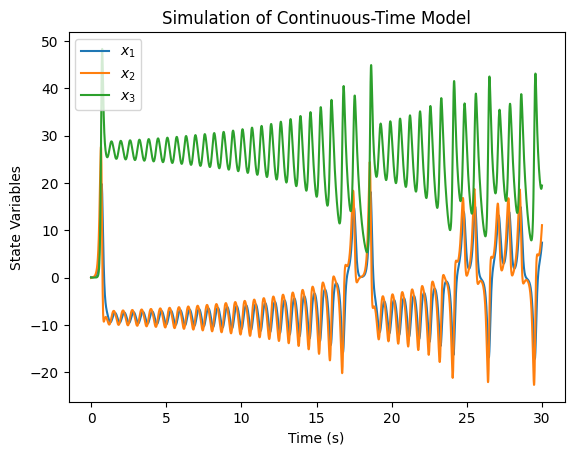

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_vec, x_vec[:, 0], label='$x_1$')
plt.plot(t_vec, x_vec[:, 1], label='$x_2$')
plt.plot(t_vec, x_vec[:, 2], label='$x_3$')
plt.xlabel('Time (s)')
plt.ylabel('State Variables')
plt.title('Simulation of Continuous-Time Model')
plt.legend()
plt.show()


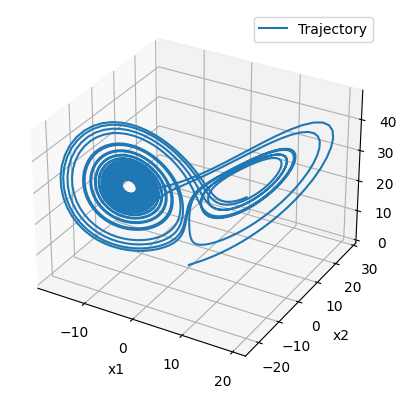

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1, x2, x3 = x_vec[:,0], x_vec[:,1], x_vec[:,2]
ax.plot(x1, x2, x3, label='Trajectory')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()
plt.show()

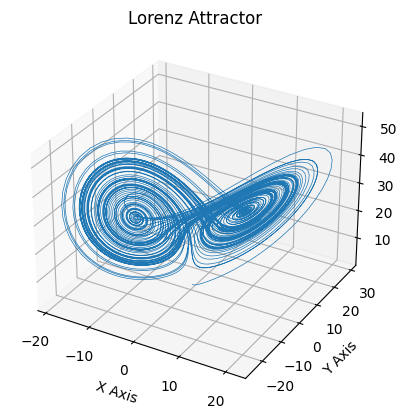

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

If you wanna see live animation of the lorenz System, then I recommend you run belowe code in python IDLE other than python notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Lorenz system equations
def lorenz(t, xyz):
    x, y, z = xyz
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Initial conditions
initial_conditions = [1.0, 0.0, 20.0]

# Time span for simulation
t_span = (0, 25)
t_eval = np.linspace(*t_span, 1000)

# Function to update the plot in each animation frame
def update(frame):
    ax.cla()
    ax.set_title(f"Lorenz System - Time: {t_eval[frame]:.2f}")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")

    # Plot the trajectory up to the current frame
    sol = solve_ivp(lorenz, t_span, initial_conditions, t_eval=t_eval[:frame+1])
    x, y, z = sol.y

    # Plot the trajectory line
    ax.plot(x, y, z, color='b', alpha=0.7)

    # Plot the current point
    ax.scatter([x[-1]], [y[-1]], [z[-1]], color='r', s=50, label='Current Point')

    ax.legend()


# Create the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set up the initial plot
ax.set_title("Lorenz System")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Create the animation
#animation = FuncAnimation(fig, update, frames=len(t_eval), interval=50, repeat=False)
# Create the animation with a faster frame speed
animation = FuncAnimation(fig, update, frames=len(t_eval), interval=10, repeat=False)


# Show the plot
plt.show()
